### Polynomiell regression
Ett _polynom_ är en form 

$\mathbb{P}(n) = a_0 + a_1x_1 + a_2x_2^2 + \ldots + a_nx_n^n$

Polynomiell regression är ett specialfall av multipel linjär regression men i en variabel:

$y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $

Vi har alltså bara en parameter, men flera _features_ (sv. egenskap, oftast svengelska 'fit-sjur'). Varje kolumn är en potens av vår inparameter.

$$
\begin{pmatrix}
 y_1\\
 y_2\\
 \vdots\\
 y_n\\
\end{pmatrix} =
\begin{pmatrix}
 1&  x_1& x_1^2  &\dots & x_1^m \\
 1&  x_2& x_2^2 & \dots & x_2^m\\
 \vdots&\vdots  &\vdots  &\ddots & \vdots\\
 1& x_n & x_n^2 & \dots & x_n^m\\
\end{pmatrix}
\begin{pmatrix}
 \beta_0\\
 \beta_1\\
 \vdots\\
 \beta_m\\
\end{pmatrix} + 

\begin{pmatrix}
 \epsilon_0\\
 \epsilon_1\\
 \vdots\\
 \epsilon_n\\
\end{pmatrix}
$$

Vad är det som är linjärt här egentligen? Jo, det är multiplikation med ett tal (en _skalär_) som är linjär för polynom. Låt $\mathcal{L}(n)$ vara funktionen som multiplicerar ett polynom, säg $\mathbb{P}(2) = x²$, med $n$ -- dvs $\mathcal{L}(3) = 3x²$. Då gäller att
\begin{equation}
\mathcal{L}(a) + \mathcal{L}(b) = \mathcal{L}(a+b)
\end{equation}
Villket är ett tillräckligt villkor för linjäritet. Lite löst uttryckt är det koefficienterna som vi uppskattar så då är problemet vi löser linjärt. Precis som vid multipel regression är det flera linjer vi uppskattar -- en för varje koefficient som alltså är någon sorts viktning eller skalfaktor på varje komponent av polynomet. Det är operationerna på dessa koefficienter i regressionen som alltså är linjära.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


<Axes: title={'center': '$y = x^2 + 0.5x + 3 + \\epsilon$'}>

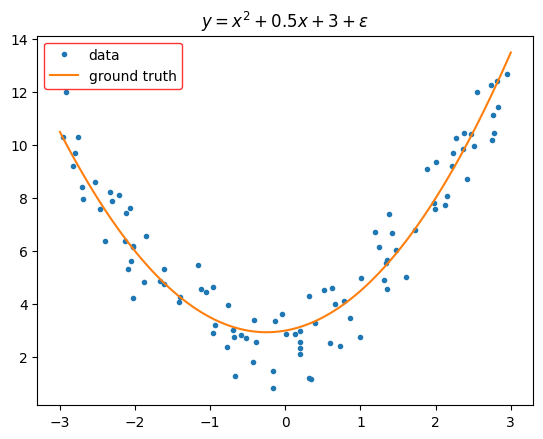

In [8]:
# define the function for for groud truth
def ground_truth(x):
    return np.square(x) + .5*x + 3 # y = x^2 + 0.5x + 3

# define the draw function
def draw_data(x, y): # x is the input, y is the output
    fig = plt.figure(dpi=100) # set the dpi
    ax = plt.axes() # create a new axes
    ax.plot(X, y, '.', label='data') # plot the data

    x = np.linspace(-3, 3, samples) # create a new x
    ax.plot(x, ground_truth(x), label='ground truth') # plot the ground truth x is the input, ground_truth(x) is the output

    ax.set(title='$y = x^2 + 0.5x + 3 + \epsilon$') # set the title
    ax.legend(edgecolor='r') # set the legend with red edge

    return ax # return the axes

samples = 100
X = np.random.uniform(-3, 3, (samples, 1)) # create a random input with 100 samples between -3 and 3 and 1 feature
y = ground_truth(X) + np.random.randn(samples, 1) # create a random output with 100 samples and 1 feature

draw_data(X, y) # draw the data

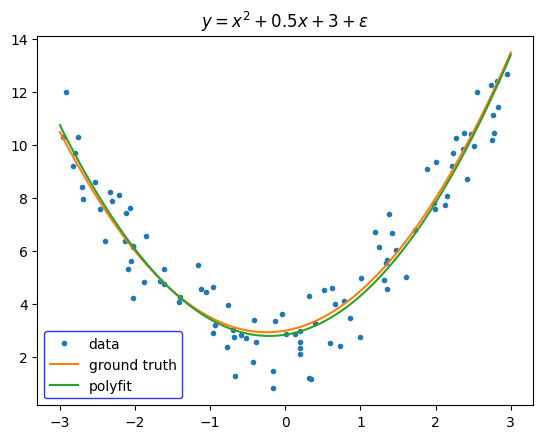

array([[1.02642347],
       [0.44205317],
       [2.84513735]])

In [10]:
# Solve with polyfit, note that x is a list of lists-- so we go a reshape (-1 is a placeholder for the number of samples 'lenght of list')
beta_hat = np.polyfit(X.reshape(-1), y , 2) # fit the data with a polynomial of degree 2
ax = draw_data(X, y) # draw the data
x = np.linspace(-3, 3, samples) # create a new x

# note that we apply the beta_hat to the x values like a second degree polynomial
#ax.plot(x, beta_hat[0]*x**2 + beta_hat[1]*x + beta_hat[2], label='polyfit') # plot the polynomial fit
ax.plot(x, np.polyval(beta_hat, x), label='polyfit') # plot the polynomial fit
ax.legend(edgecolor='b') # set the legend with blue edge
plt.show() # show the plot
beta_hat


In [11]:
# Mer generically, we can use the following function to fit a polynomial of any degree with sklearn
from sklearn.preprocessing import PolynomialFeatures

# 'bias' means beta_0 or the intercept .. we come back to this later
poly = PolynomialFeatures(degree=2, include_bias=False) # create a polynomial feature object

'''Here we apply the polynomial model to the input data, and then fit the model to the output data'''
poly_features = poly.fit_transform(X) # apply the polynomial model to the input data
poly_features[:4] , X[:4] # show the first 4 polynomial features and the first 4 inputs

(array([[-1.15780637,  1.34051559],
        [ 0.31231093,  0.09753812],
        [-1.4037563 ,  1.97053176],
        [-0.42786328,  0.18306699]]),
 array([[-1.15780637],
        [ 0.31231093],
        [-1.4037563 ],
        [-0.42786328]]))

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # create a linear regression model
model.fit(poly_features, y) # fit the model to the output data
model.intercept_, model.coef_ # show the intercept and the coefficients

(array([2.84513735]), array([[0.44205317, 1.02642347]]))

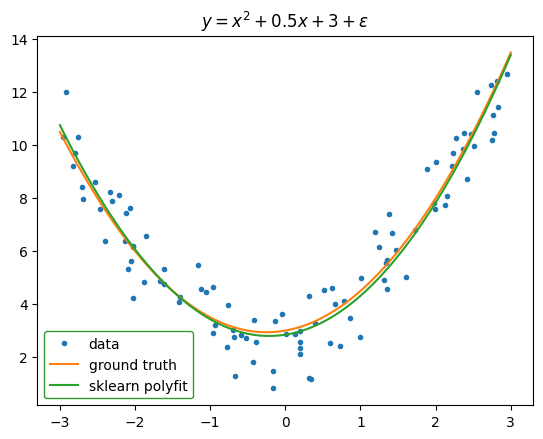

In [13]:
x = np.linspace(-3, 3, samples) # create a new x with 100 samples between -3 and 3
x_poly_features = poly.fit_transform(x.reshape(-1, 1)) # apply the polynomial model to the new x
'''Here we apply the polynomial model to the new x, and then use the model to predict the output'''
'''This is a more general way to fit a polynomial model to the data'''
y_pred = model.predict(x_poly_features) # use the model to predict the output

ax = draw_data(X, y) # draw the data
ax.plot(x, y_pred, label='sklearn polyfit') # plot the polynomial fit
ax.legend(edgecolor='g') # set the legend with green edge

### Databehandling 

Normalizering skalar ett värde mellan [0, 1]. Detta är relevand föra alla OLS och de flesta sorters regression. Om viss parametrar har mycket större utslag på förutsägelsen är de förstås känsligare än andra parametrar.

Normalisering (min-max feature scaling)

- $X' = \frac{X-X_{\mathtt{min}}}{X_{\mathtt{max}}-X_{\mathtt{min}}}$


De flesta algoritmer förlitar sig i botten på CGS. Därför vill vi gärna __centrera datan__ kring noll. Detta kalla __standardisering__. 

Centrering (standard score scalling)

- $X' = \frac{X - \mu}{\sigma}$

Om datan är centrerad förväntar vi oss ingen __intercept__ och att reg-linjen __skär origo__. Därav termen **bias**, dvs on det finns en sådan term är den en fördelning bort från den __förvändade värdet__.

Om datan är dimensionslös eller om vi är övertygade on att datan är N-fördelad så är det riskfritt att datan standardiseras. On datans distribution är helt okänd och/eller använder olika skalor för olika parametrar (t.ex micro vs kilo) så bor datan __normaliseras__.

Om vi utför båda operationerna blir datan __standar-normal__ men det kan slå väldigt slint om datan har dolda beroenden i sig. Här räcker dock inte teknikerna som vi hittils använt för att undvika detta - - detta är en inneboende begränsning hos OLS metoderan. On datan inte är N-fördelade kring ett underliggande oberoende samband, t.ex genom djupa korrelationer mellan olika parametrar, så kommer __MK-metoder__ helt enkelt inte hitta någon bra lösning. Ofta undviker vi därför standatdisering i OLS, åtminstone utan djupa stat-analys.


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../data/advertising.csv', index_col=0)

In [25]:
print(f'{df.shape[0]} samples')
print(f'{df.shape[1] -1} features') # -1 because price_unit_area is the label and not a feature

X, y = df.drop('Sales', axis='columns'), df['Sales'] # separate the input and output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # split the data into training and testing sets

X_train.shape, X_test.shape, y_train.shape, y_test.shape # show the shapes of the training and testing sets

# we use normalization to scale the data
# we use the MinMaxScaler to scale the data
scaler = MinMaxScaler() # create a MinMaxScaler object
scaler.fit(X_train) # fit the scaler to the training data
X_train_scaled = scaler.transform(X_train) # transform the training data
X_test_scaled = scaler.transform(X_test) # transform the testing data

# print the scaled data
print(f'{X_train_scaled.min():.2f} <= X_train_scaled <= {X_train_scaled.max():.2f}')
print(f'{X_test_scaled.min():.2f} <= X_test_scaled <= {X_test_scaled.max():.2f}')

200 samples
3 features
0.00 <= X_train_scaled <= 1.00
0.01 <= X_test_scaled <= 1.13


\begin{equation}
\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^n{(y_i -\hat{y}_i)²}
\end{equation}

\begin{equation}
\mathrm{RSS} = \sum_{i=1}^n{(y_i -\hat{y}_i)²}
\end{equation}

MSE = Bias² + Varians + Brus (irreducibelt fel)

### Ridge regression

$C(\beta) = \mathrm{RSS} + \lambda\sum_{i=i}^p{\beta_i²}$

$|A|$ $||A||$ $||A||_2$

$|\mathbb{A}\mathbb{X}-\mathbb{b}|²$